In [38]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

2020 4월까지의 데이터를 바탕으로 2020 7월 데이터를 예측한다.
-> 4월까지만 사용 가능

문제점: 2019 12월 말부터 발생한 코로나가 1,2월쯤 우리나라에 영향을 미치기 시작함
카드 사용량의 추세는 1,2월은 큰 영향이 없었으나, 3월에 2008년 금융위기 이후 최저 수준
http://news.einfomax.co.kr/news/articleView.html?idxno=4085969

4월부터는 회복세 

예측해야할 7월은 휴가철
휴가의 경우 해외 여행이 사실상 불가능한 시기로 제주도 여행이 많아짐
https://m.trndf.com/news/newsview.php?ncode=1065586320580250
예약 예년에 비해 2배 (신라 호텔 등)
중국 동남아용 2~3성급은 빈방이 많다고 하나 BC 카드 기준으로 영향 없어 보임
https://www.mk.co.kr/news/business/view/2020/06/630459/
제주관광청에 따르면 올해 5월 제주 관광객수는 55만명으로 전년동기 132만명의 절반도 안된다. 특히 2·3성급 호텔의 주요 고객인 중국 단체 관광객과 수학여행 학생들의 수요가 사라지면서 이들 호텔의 투숙률은 여전히 낮은 상태다.
-> 외국인과 수학여행 등은 BC카드랑 연관이 크게 없어 보임


In [39]:
#!pip install pandas
#!pip install numpy
#!pip install sklearn

In [40]:
print('Pandas : %s'%(pd.__version__))
print('Numpy : %s'%(np.__version__))
print('Scikit-Learn : %s'%(sklearn.__version__))
!python --version

Pandas : 1.0.3
Numpy : 1.19.0
Scikit-Learn : 0.23.1
Python 3.8.3


In [41]:
def grap_year(data):
    data = str(data)
    return int(data[:4])

def grap_month(data):
    data = str(data)
    return int(data[4:])

In [42]:
data = pd.read_csv('data/201901-202003.csv')

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24697792 entries, 0 to 24697791
Data columns (total 12 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   REG_YYMM      int64 
 1   CARD_SIDO_NM  object
 2   CARD_CCG_NM   object
 3   STD_CLSS_NM   object
 4   HOM_SIDO_NM   object
 5   HOM_CCG_NM    object
 6   AGE           object
 7   SEX_CTGO_CD   int64 
 8   FLC           int64 
 9   CSTMR_CNT     int64 
 10  AMT           int64 
 11  CNT           int64 
dtypes: int64(6), object(6)
memory usage: 2.2+ GB


In [44]:
data.describe()

,REG_YYMM,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT
count,2.469779e+07,2.469779e+07,2.469779e+07,2.469779e+07,2.469779e+07,2.469779e+07
mean,2.019231e+05,1.412645e+00,2.804429e+00,6.196855e+01,2.441353e+06,1.260450e+02
std,3.619561e+01,4.923099e-01,1.375455e+00,3.559175e+02,1.726096e+07,9.669387e+02
min,2.019010e+05,1.000000e+00,1.000000e+00,3.000000e+00,2.000000e+01,1.000000e+00
25%,2.019040e+05,1.000000e+00,2.000000e+00,4.000000e+00,9.020000e+04,5.000000e+00
50%,2.019080e+05,1.000000e+00,3.000000e+00,8.000000e+00,2.526800e+05,1.200000e+01
75%,2.019110e+05,2.000000e+00,4.000000e+00,2.400000e+01,8.433372e+05,4.000000e+01
max,2.020030e+05,2.000000e+00,5.000000e+00,3.281300e+04,2.349524e+09,1.203570e+05


In [45]:
data.isnull().sum()

REG_YYMM             0
CARD_SIDO_NM         0
CARD_CCG_NM      87213
STD_CLSS_NM          0
HOM_SIDO_NM          0
HOM_CCG_NM      147787
AGE                  0
SEX_CTGO_CD          0
FLC                  0
CSTMR_CNT            0
AMT                  0
CNT                  0
dtype: int64

In [46]:
data = data.drop(['CARD_CCG_NM','HOM_CCG_NM'],axis=1)
data = data.drop(['HOM_SIDO_NM'],axis=1)

In [47]:
# 날짜 처리
#year, month, card_sido_nm, std_clss_nm

#data = pd.read_csv('data/201901-202003.csv')
data = data.fillna('')
data['year'] = data['REG_YYMM'].apply(lambda x: grap_year(x))
data['month'] = data['REG_YYMM'].apply(lambda x: grap_month(x))
data = data.drop(['REG_YYMM'], axis=1)

In [21]:
data
#가구생애주기 (1: 1인가구, 2: 영유아자녀가구, 3: 중고생자녀가구, 4: 성인자녀가구, 5: 노년가구)

,CARD_SIDO_NM,STD_CLSS_NM,HOM_SIDO_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT,year,month,nexy_year,next_month
0,강원,건강보조식품 소매업,강원,20s,1,1,4,311200,4,2019,1,2020,2
1,강원,건강보조식품 소매업,강원,30s,1,2,7,1374500,8,2019,1,2020,2
2,강원,건강보조식품 소매업,강원,30s,2,2,6,818700,6,2019,1,2020,2
3,강원,건강보조식품 소매업,강원,40s,1,3,4,1717000,5,2019,1,2020,2
4,강원,건강보조식품 소매업,강원,40s,1,4,3,1047300,3,2019,1,2020,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24697787,충북,휴양콘도 운영업,충북,30s,1,2,3,43300,4,2020,3,2021,4
24697788,충북,휴양콘도 운영업,충북,40s,1,3,3,35000,3,2020,3,2021,4
24697789,충북,휴양콘도 운영업,충북,50s,1,4,4,188000,6,2020,3,2021,4
24697790,충북,휴양콘도 운영업,충북,50s,2,4,4,99000,6,2020,3,2021,4


In [48]:
data = data.groupby(['CARD_SIDO_NM', 'STD_CLSS_NM', 'year', 'month']).sum().reset_index(drop=False)

In [49]:
data = data.drop(['SEX_CTGO_CD','FLC'],axis=1)
data

,CARD_SIDO_NM,STD_CLSS_NM,year,month,CSTMR_CNT,AMT,CNT
0,강원,건강보조식품 소매업,2019,1,1080,148354746,1128
1,강원,건강보조식품 소매업,2019,2,1125,146715871,1157
2,강원,건강보조식품 소매업,2019,3,965,109439025,1020
3,강원,건강보조식품 소매업,2019,4,981,106548473,1042
4,강원,건강보조식품 소매업,2019,5,1181,148115738,1235
...,...,...,...,...,...,...,...
9433,충북,휴양콘도 운영업,2019,11,1405,124117555,2204
9434,충북,휴양콘도 운영업,2019,12,1618,139568962,2539
9435,충북,휴양콘도 운영업,2020,1,2385,222073112,3743
9436,충북,휴양콘도 운영업,2020,2,588,47085830,913


In [50]:
data['next_year'] = data.apply(lambda x : x['year']+1, axis=1)
data['next_month'] = data.apply(lambda x: x['month']+1 if x['month'] < 12 else 1, axis=1)

In [68]:
data[data['month'] == 11]

,CARD_SIDO_NM,STD_CLSS_NM,year,month,CSTMR_CNT,AMT,CNT,next_year,next_month
10,강원,건강보조식품 소매업,2019,11,1019,98084641,1089,2020,12
25,강원,골프장 운영업,2019,11,21701,4017469979,27952,2020,12
40,강원,과실 및 채소 소매업,2019,11,19663,1052641622,26816,2020,12
55,강원,관광 민예품 및 선물용품 소매업,2019,11,1399,30940070,1628,2020,12
71,강원,그외 기타 스포츠시설 운영업,2019,11,78,6808100,106,2020,12
...,...,...,...,...,...,...,...,...,...
9373,충북,피자 햄버거 샌드위치 및 유사 음식점업,2019,11,86683,1272052687,123643,2020,12
9388,충북,한식 음식점업,2019,11,531753,21434295568,777042,2020,12
9403,충북,호텔업,2019,11,651,53897740,958,2020,12
9418,충북,화장품 및 방향제 소매업,2019,11,11930,580160733,13857,2020,12


In [52]:
data_next_year = data.copy()

In [53]:
data_next_year
data_next_year['year'] = data_next_year['next_year']

In [54]:
data_next_month = data.copy()

In [71]:
data_next_month['month'] = data_next_month['next_month']
data_next_month['year'] = data_next_month.apply(lambda x: x['next_year'] if x['month'] == 1 else x['year'], axis=1)

In [76]:
data_year = data.join(data_next_year.set_index(['CARD_SIDO_NM','STD_CLSS_NM','year','month']), on=['CARD_SIDO_NM','STD_CLSS_NM','year','month'], rsuffix='_next')

In [77]:
data_month = data.join(data_next_month.set_index(['CARD_SIDO_NM','STD_CLSS_NM','year','month']), on=['CARD_SIDO_NM','STD_CLSS_NM','year','month'], rsuffix='_next')

In [80]:
#!pip install seaborn

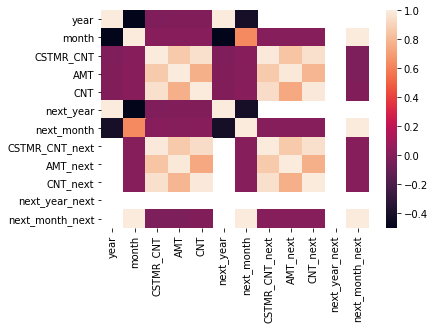

In [81]:
import seaborn as sns

corr = data_year.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

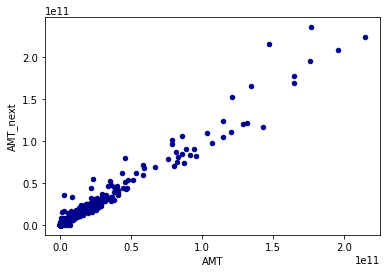

In [82]:
ax1 = data_year.plot.scatter(x='AMT',

                      y='AMT_next',

                      c='DarkBlue')

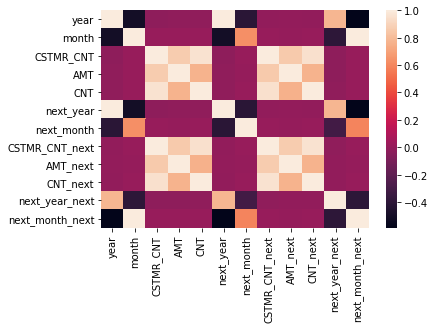

In [84]:
corr = data_month.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

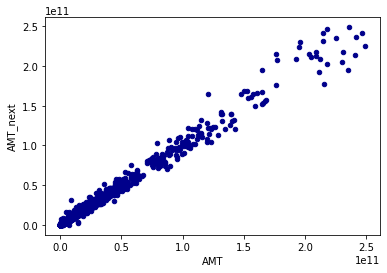

In [83]:
ax2 = data_month.plot.scatter(x='AMT',

                      y='AMT_next',

                      c='DarkBlue')

-----------------------여기 까지----------------------------